In [73]:
from ecallisto_ng.combine_antennas.virtualantenna import EcallistoVirtualAntenna
from datetime import datetime
from ecallisto_ng.data_download.downloader import (
    get_ecallisto_data,
)
import numpy as np
from ecallisto_ng.plotting.plotting import plot_spectogram, plot_spectogram_mpl
from ecallisto_ng.data_processing.utils import subtract_low_signal_noise_background, subtract_constant_background, min_max_scale_per_column, apply_median_filter
from ecallisto_ng.plotting.utils import calculate_resample_freq

In [74]:
def rolling_mean_std(df):
    # Calculate rolling standard deviation for each frequency
    rolling_std = df.rolling(f'10s').std()

    # Average the standard deviations across all frequencies at each time point
    average_rolling_std = rolling_std.mean(axis=1)

    # If you need a single average value across all time points and frequencies
    overall_average_std = average_rolling_std.mean()
    return overall_average_std

def sum_gradient_magnitude(df):
    # Assuming `image` is your 2D numpy array representing the image
    grad_y, grad_x = np.gradient(df.values)

    # Calculate the magnitude of the gradient
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # If you want to sum the gradient magnitudes
    return np.sum(grad_magnitude)

In [75]:
# 20230810	02:45-02:59
start_datetime = datetime(2023, 8, 10, 1, 30)
end_datetime = datetime(2023, 8, 10, 4, 00)
substrings_to_get = ['ASSA', 'ALASKA-HAARP', 'ALASKA-COHOE']
# Download all available data
datas = []
for substring in substrings_to_get:
    dfs = get_ecallisto_data(start_datetime, end_datetime, substring)
    if isinstance(dfs, dict):
        datas.extend(dfs.values())
    else:
        datas.append(dfs)

C:\Users\vince\AppData\Local\Temp\ipykernel_68820\4103228273.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


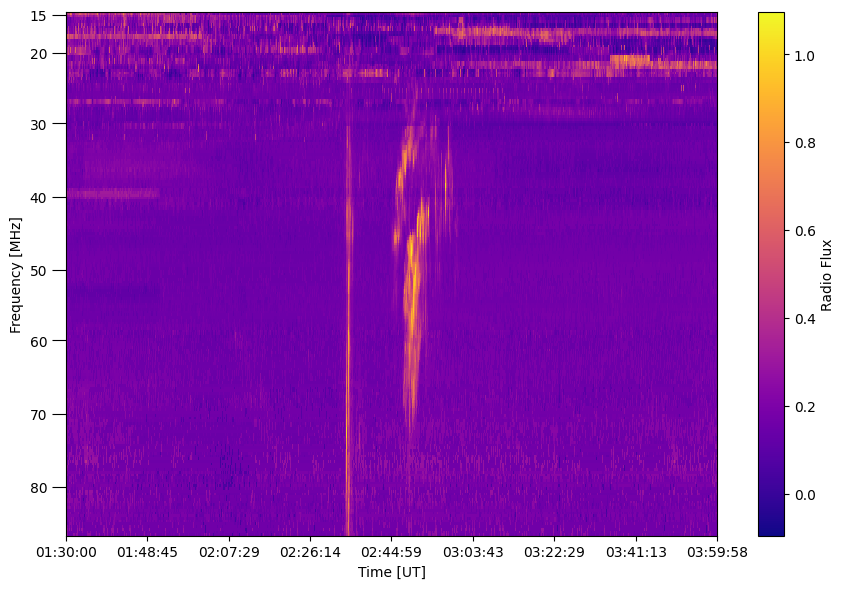

In [103]:
df = subtract_constant_background(datas[2])
df = subtract_low_signal_noise_background(df)
df = min_max_scale_per_column(df)
df = apply_median_filter(df, (3,3))
fig = plot_spectogram_mpl(subtract_low_signal_noise_background(df), title=None)
fig.show()

In [77]:
sample_freq = calculate_resample_freq(start_datetime, end_datetime, 1440)

In [78]:
eva = EcallistoVirtualAntenna(freq_range=[20, 80], resample_time_delta=sample_freq, filter_type='median', filter_size=(12, 12))

In [79]:
datas_ready, _ = eva.preprocess_match_sync(datas, method='round', bin_width=0.2)

Combining 7 spectograms.
Skipping Australia-ASSA_60 it has only has 0 out of 30 frequencies
Binning the frequencies with a bin width of 0.2.
Matching and syncing the spectograms.
Reference spectogram is Australia-ASSA.


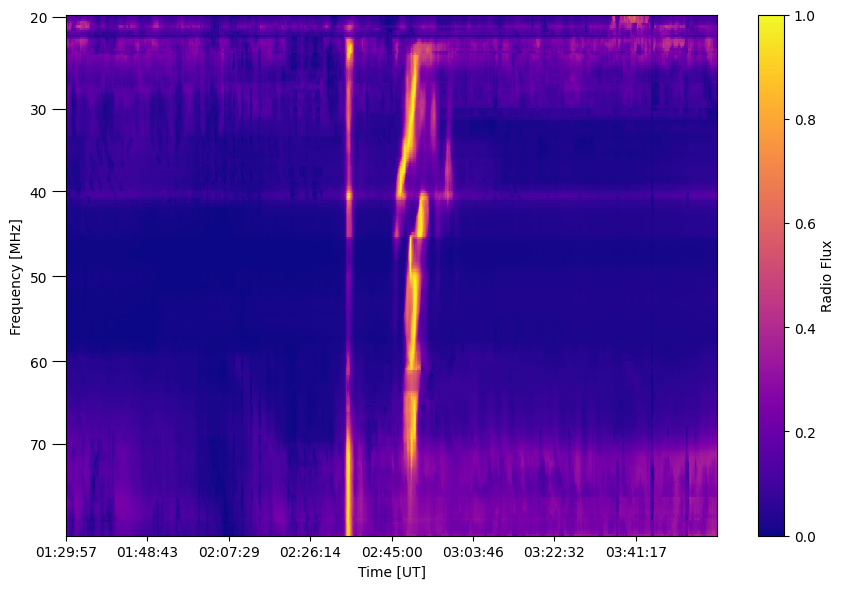

In [105]:
res = eva.combine(datas_ready, quantile=0.2)
fig = plot_spectogram_mpl(res, title=None)

Epoch 0, Loss: 0.3023451268672943
Epoch 10, Loss: 0.2646186053752899
Epoch 20, Loss: 0.23007972538471222
Epoch 30, Loss: 0.19851098954677582
Epoch 40, Loss: 0.1751338690519333
Epoch 50, Loss: 0.15846191346645355
Epoch 60, Loss: 0.14654920995235443
Epoch 70, Loss: 0.13796205818653107
Epoch 80, Loss: 0.13219958543777466
Epoch 90, Loss: 0.12881390750408173
Epoch 100, Loss: 0.12720288336277008
Epoch 110, Loss: 0.1266222894191742
Epoch 120, Loss: 0.12642253935337067
Epoch 130, Loss: 0.126304030418396
Epoch 140, Loss: 0.12625160813331604
Epoch 150, Loss: 0.1262275129556656
Epoch 160, Loss: 0.1262178272008896
Epoch 170, Loss: 0.12621398270130157
Epoch 180, Loss: 0.12621359527111053
Epoch 190, Loss: 0.12621407210826874


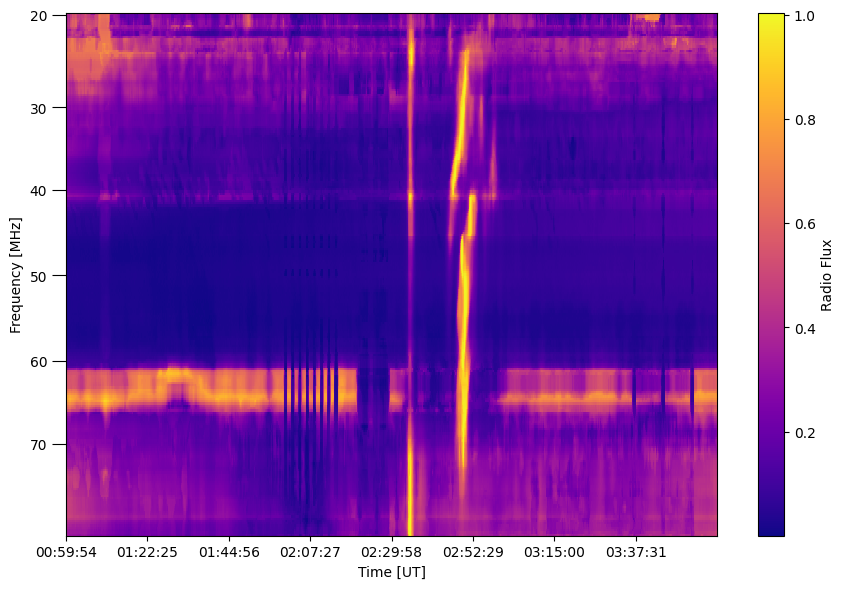

In [46]:
res = eva.combine(datas_ready, method='loss', epochs=200, ignore_ratio=0.1, grad_penalty_weight=0.01)
fig = plot_spectogram_mpl(res, title=None)

In [171]:
eva = EcallistoVirtualAntenna(freq_range=[20, 80], filter_type='median', filter_size=(3, 3))

In [165]:
# 20230810	02:45-02:59
start_datetime = datetime(2021, 5, 7, 3, 40, 0)
end_datetime = datetime(2021, 5, 7, 3, 41, 0)
substrings_to_get = ['ASSA']
# Download all available data
datas = []
for substring in substrings_to_get:
    dfs = get_ecallisto_data(start_datetime, end_datetime, substring)
    if isinstance(dfs, dict):
        datas.extend(dfs.values())
    else:
        datas.append(dfs)

In [172]:
datas_ready, _ = eva.preprocess_match_sync(datas, method='round', bin_width=0.2)

Combining 3 spectograms.
Skipping Australia-ASSA_60 it has only has 0 out of 30 frequencies
Binning the frequencies with a bin width of 0.2.
Matching and syncing the spectograms.
Reference spectogram is Australia-ASSA.


In [173]:
datas_ready[0].attrs['FULLNAME']

'Australia-ASSA_01'

In [174]:
res = eva.combine(datas_ready, quantile=0.4)

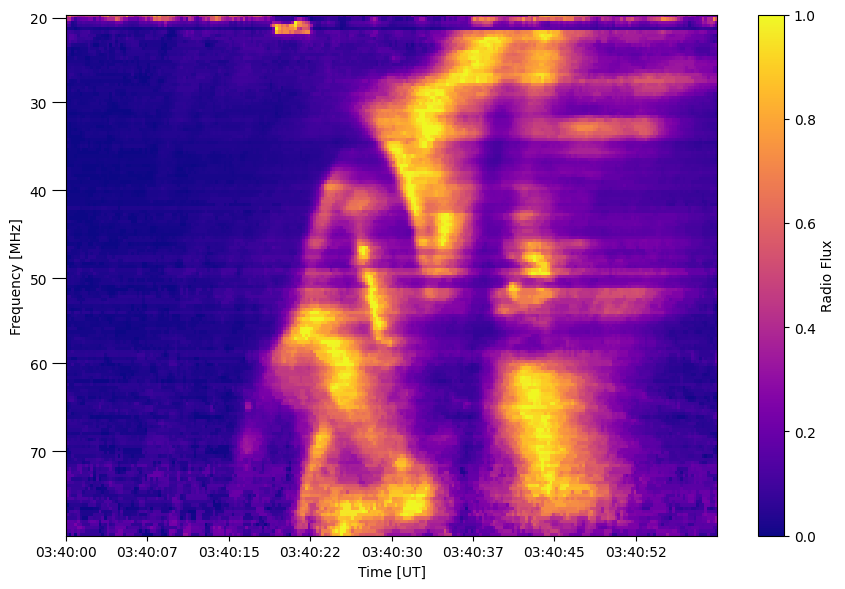

In [175]:
fig = plot_spectogram_mpl(res, title=None)

In [198]:
# 20230810	02:45-02:59
start_datetime = datetime(2024, 2, 8, 11, 40, 0)
end_datetime = datetime(2024, 2, 8, 11, 58, 0)
substrings_to_get = [
    "ALGERIA-CRAAG",
    "AUSTRIA-Krumbach",
    "AUSTRIA-UNIGRAZ",
    "BIR",
    "EGYPT-Alexandria",
    "EGYPT-SpaceAgency",
    "FINLAND-Siuntio",
    "GERMANY-DLR",
    "GLASGOW",
    "HUMAIN",
    "HURBANOVO",
    "INDIA-OOTY",
    "INDIA-UDAIPUR",
    "NORWAY-EGERSUND",
    "ROMANIA",
    "SPAIN-PERALEJOS",
    "SWISS-Landschlacht",
    "SWISS-MUHEN",
    "TRIEST"
]
# Download all available data
datas = []
for substring in substrings_to_get:
    dfs = get_ecallisto_data(start_datetime, end_datetime, substring)
    if isinstance(dfs, dict):
        datas.extend(dfs.values())
    else:
        datas.append(dfs)

In [199]:
resample_freq = calculate_resample_freq(start_datetime, end_datetime, 1440)

In [200]:
eva = EcallistoVirtualAntenna(freq_range=[20, 80], resample_time_delta=resample_freq, filter_type='median', filter_size=(12,12))

In [201]:
datas_ready, _ = eva.preprocess_match_sync(datas, method='round', bin_width=0.2)

Combining 34 spectograms.
Skipping AUSTRIA-Krumbach_10 it has only has 17 out of 30 frequencies
Skipping EGYPT-SpaceAgency_01 it has only has 0 out of 30 frequencies
Skipping FINLAND-Siuntio_01 it has only has 0 out of 30 frequencies
Skipping GERMANY-DLR_01 it has only has 0 out of 30 frequencies
Skipping GERMANY-DLR_02 it has only has 8 out of 30 frequencies
Skipping GERMANY-DLR_03 it has only has 0 out of 30 frequencies
Skipping SWISS-MUHEN_03 it has only has 0 out of 30 frequencies
Skipping TRIEST_59 it has only has 0 out of 30 frequencies
Skipping TRIEST_60 it has only has 0 out of 30 frequencies
Binning the frequencies with a bin width of 0.2.
Matching and syncing the spectograms.
Reference spectogram is INDIA-UDAIPUR.


In [210]:
res = eva.combine(datas_ready, quantile=0.3)

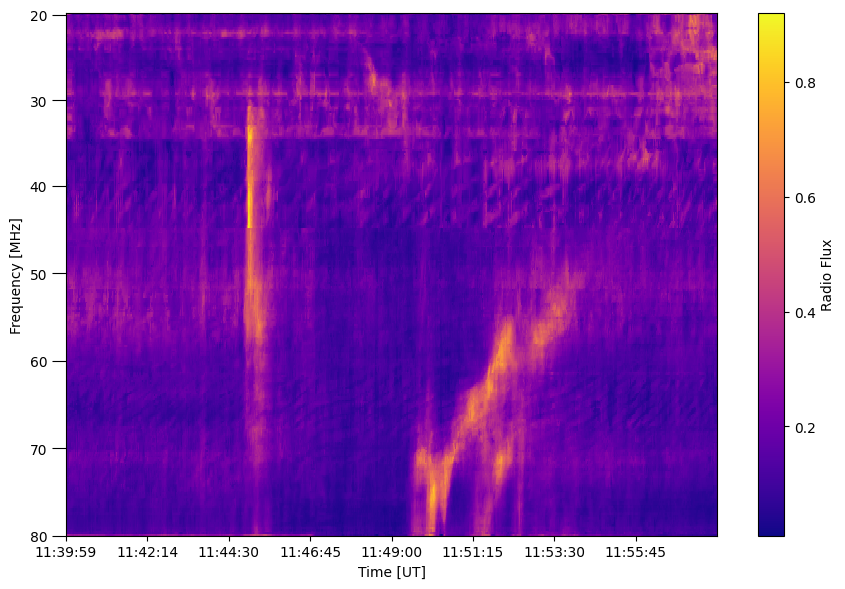

In [211]:
fig = plot_spectogram_mpl(res, title=None)